# Imports

In [2]:
# imports for the exploratory data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# importing the dataset

df = pd.read_csv('/home/caria/MEDM/in-vehicle-coupon-recommendation.csv')

df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Contributing to the project


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load data
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')


In [6]:
# Show index of duplicates
df_duplicate_analisys = df[df.duplicated(keep=False)]

def remove_dup(df: pd.DataFrame):
    # Now remove duplicates
    df = df.drop_duplicates()
    return df


In [7]:
# Value mapping

def value_mapping(df: pd.DataFrame):
    frequency_map = {'never': 0,'less1': 1,'1~3': 2,'4~8': 3,'gt8': 4}
    age_map = {'below21': 0,'21': 1,'26': 2,'31': 3,'36': 4,'41': 5,'46': 6,'50plus': 7}
    income_map = {'Less than $12500': 0,'$12500 - $24999': 1,'$25000 - $37499': 2,'$37500 - $49999': 3,
    '$50000 - $62499': 4,'$62500 - $74999': 5,'$75000 - $87499': 6,'$87500 - $99999': 7,'$100000 or More': 8}
    temperature_map = {30: 0,55: 1,80: 2}

    # CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, Bar
    df['CoffeeHouse'] = df['CoffeeHouse'].map(frequency_map)
    df['CarryAway'] = df['CarryAway'].map(frequency_map)
    df['RestaurantLessThan20'] = df['RestaurantLessThan20'].map(frequency_map)
    df['Restaurant20To50'] = df['Restaurant20To50'].map(frequency_map)
    df['Bar'] = df['Bar'].map(frequency_map)

    #age
    df['age'] = df['age'].map(age_map)

    #income 
    df['income'] = df['income'].map(income_map)

    #temperature
    df['temperature'] = df['temperature'].map(temperature_map)

    return df


In [8]:
# Drop columns

def drop_columns(df: pd.DataFrame):
    df = df.drop(columns=['car'])
    #df = df.drop(columns=['toCoupon_GEQ5min'])
    df = df.drop(columns=['direction_opp'])
    return df

In [9]:
# combine toCoupon_GEQ5min’, toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ into one column 0, 1, 2 values

#0: driving distance is less than or equal to 15 min
#1: driving distance is greater than 15 min and less than or equal to 25 min
#2: driving distance is greater than 25 min

def combine_distance_columns(df):
    """
    Combine 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', and 'toCoupon_GEQ25min' 
    columns into a single column 'to_coupon'.
    
    Parameters:
    - df (pd.DataFrame): The input dataframe
    
    Returns:
    - df (pd.DataFrame): The modified dataframe with the 'to_coupon' column
    """
    
    def assign_to_coupon(row):
        if row['toCoupon_GEQ25min'] == 1:
            return 2
        elif row['toCoupon_GEQ15min'] == 1:
            return 1
        else:
            return 0

    # add the new column at penultimate position (before 'Y')
    df.insert(len(df.columns) - 1, 'to_coupon', np.nan)
    df['to_coupon'] = df.apply(assign_to_coupon, axis=1)

    # Drop the original columns
    df.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis=1, inplace=True)
    
    return df


In [10]:
df_test1 = df.copy()

df_test1 = remove_dup(df_test1)
df_test1 = value_mapping(df_test1)
df_test1 = drop_columns(df_test1)
df_test1 = combine_distance_columns(df_test1)

# Try

## Age vs Marital Status

We ended up not grouping the two variables. Eventhough we might still want to take a look at that.

The biggest problem imo is that all categories except widowed appear in all age groups.

As such, I'm not sure if we can act on this information.

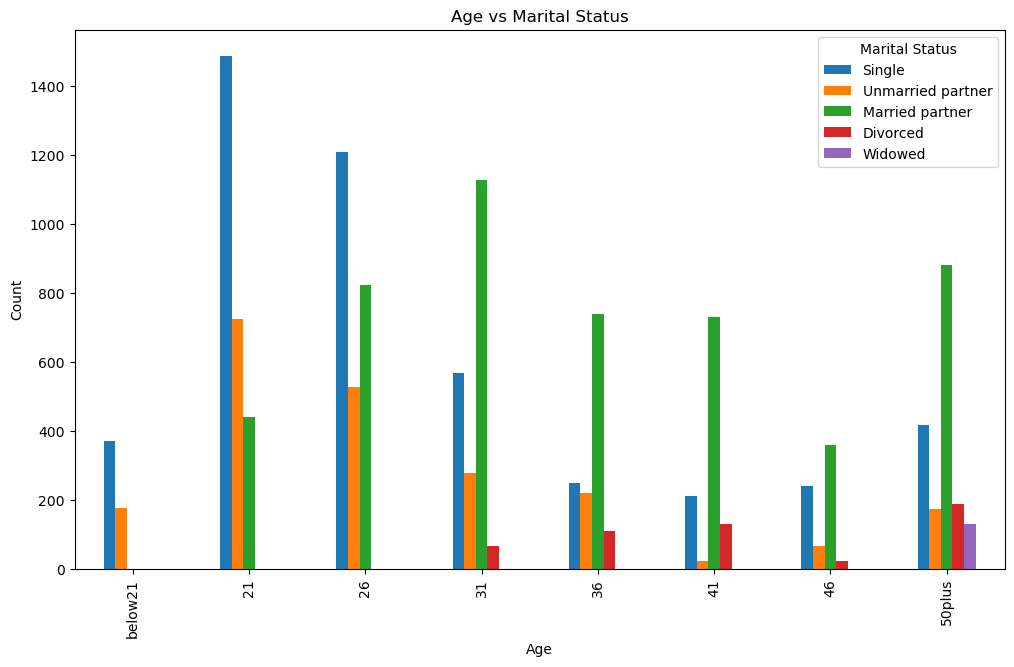

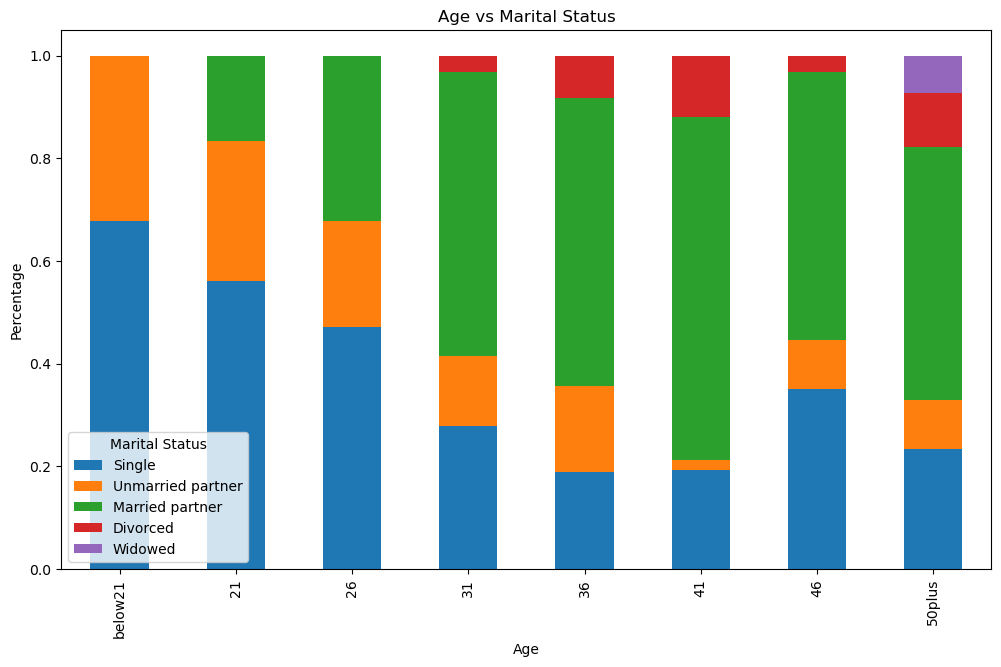

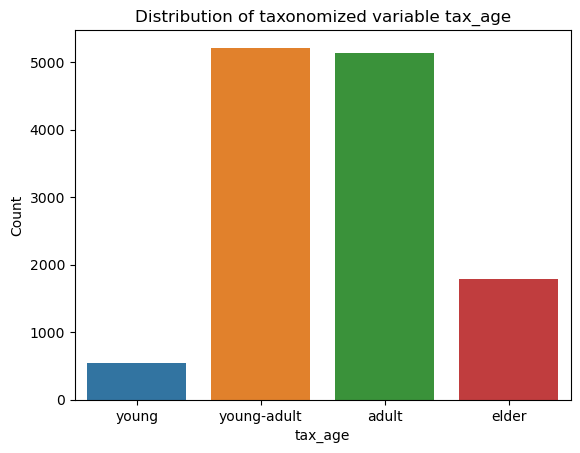

In [32]:
# analyzing age vs marital status

# defining 'age' categories order for visualization
custom_order_Age = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# defining 'maritalStatus' categories order for visualization
custom_order_MS = ['Single','Unmarried partner','Married partner','Divorced','Widowed']

# pivoting the data to get counts of each combination
pivot_df = df.groupby(['age', 'maritalStatus']).size().unstack().fillna(0)

# ordering the data based on the custom orders
pivot_df = pivot_df.reindex(custom_order_Age)[custom_order_MS]

# plotting grouped bar plot
pivot_df.plot(kind='bar', figsize=(12, 7), stacked=False)
plt.xlabel('Age')
plt.ylabel('Count')
# adding log scale to the y-axis
#plt.yscale('log')
plt.title('Age vs Marital Status')
plt.legend(title='Marital Status')
plt.show()

# redoing this, but to analyze the percentage of each marital status per age group instead of raw counts
pivot_df = df.groupby(['age', 'maritalStatus']).size().unstack().fillna(0)
pivot_df = pivot_df.reindex(custom_order_Age)[custom_order_MS]
pivot_df = pivot_df.apply(lambda x: x/x.sum(), axis=1)
pivot_df.plot(kind='bar', figsize=(12, 7), stacked=True)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Age vs Marital Status')
plt.legend(title='Marital Status')
plt.show()

# now, we create the new taxonomized variable 'tax_age'
# along the rules:
# 0: below 21
# 1: 21, 26
# 2: 31, 36, 41, 46
# 3: 50plus

df['tax_age'] = df['age'].apply(lambda x: 0 if x == 'below21' else 1 if x == '21' or x == '26' else 2 if x == '31' or x == '36' or x == '41' or x == '46' else 3)

# visualize its distribution
sns.countplot(x='tax_age', data=df)
plt.xlabel('tax_age')
plt.ylabel('Count')
# adding x legends of 'young', 'young-adult', 'adult', 'elder'
plt.xticks([0, 1, 2, 3], ['young', 'young-adult', 'adult', 'elder'])
plt.title('Distribution of taxonomized variable tax_age')
plt.show()



# Imports

In [12]:
# imports for the exploratory data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
# importing the dataset

df = pd.read_csv('/home/caria/MEDM/in-vehicle-coupon-recommendation.csv')

df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Contributing to the project


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# load data
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')


In [16]:
# Show index of duplicates
df_duplicate_analisys = df[df.duplicated(keep=False)]

def remove_dup(df: pd.DataFrame):
    # Now remove duplicates
    df = df.drop_duplicates()
    return df


In [17]:
# Value mapping

def value_mapping(df: pd.DataFrame):
    frequency_map = {'never': 0,'less1': 1,'1~3': 2,'4~8': 3,'gt8': 4}
    age_map = {'below21': 0,'21': 1,'26': 2,'31': 3,'36': 4,'41': 5,'46': 6,'50plus': 7}
    income_map = {'Less than $12500': 0,'$12500 - $24999': 1,'$25000 - $37499': 2,'$37500 - $49999': 3,
    '$50000 - $62499': 4,'$62500 - $74999': 5,'$75000 - $87499': 6,'$87500 - $99999': 7,'$100000 or More': 8}
    temperature_map = {30: 0,55: 1,80: 2}

    # CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, Bar
    df['CoffeeHouse'] = df['CoffeeHouse'].map(frequency_map)
    df['CarryAway'] = df['CarryAway'].map(frequency_map)
    df['RestaurantLessThan20'] = df['RestaurantLessThan20'].map(frequency_map)
    df['Restaurant20To50'] = df['Restaurant20To50'].map(frequency_map)
    df['Bar'] = df['Bar'].map(frequency_map)

    #age
    df['age'] = df['age'].map(age_map)

    #income 
    df['income'] = df['income'].map(income_map)

    #temperature
    df['temperature'] = df['temperature'].map(temperature_map)

    return df


In [18]:
# Drop columns

def drop_columns(df: pd.DataFrame):
    df = df.drop(columns=['car'])
    #df = df.drop(columns=['toCoupon_GEQ5min'])
    df = df.drop(columns=['direction_opp'])
    return df

In [19]:
# combine toCoupon_GEQ5min’, toCoupon_GEQ15min’ and ‘toCoupon_GEQ25min’ into one column 0, 1, 2 values

#0: driving distance is less than or equal to 15 min
#1: driving distance is greater than 15 min and less than or equal to 25 min
#2: driving distance is greater than 25 min

def combine_distance_columns(df):
    """
    Combine 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', and 'toCoupon_GEQ25min' 
    columns into a single column 'to_coupon'.
    
    Parameters:
    - df (pd.DataFrame): The input dataframe
    
    Returns:
    - df (pd.DataFrame): The modified dataframe with the 'to_coupon' column
    """
    
    def assign_to_coupon(row):
        if row['toCoupon_GEQ25min'] == 1:
            return 2
        elif row['toCoupon_GEQ15min'] == 1:
            return 1
        else:
            return 0

    # add the new column at penultimate position (before 'Y')
    df.insert(len(df.columns) - 1, 'to_coupon', np.nan)
    df['to_coupon'] = df.apply(assign_to_coupon, axis=1)

    # Drop the original columns
    df.drop(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'], axis=1, inplace=True)
    
    return df


In [20]:
df_test1 = df.copy()

df_test1 = remove_dup(df_test1)
df_test1 = value_mapping(df_test1)
df_test1 = drop_columns(df_test1)
df_test1 = combine_distance_columns(df_test1)

# Try

## Age vs Marital Status

We ended up not grouping the two variables. Eventhough we might still want to take a look at that.

The biggest problem imo is that all categories except widowed appear in all age groups.

As such, I'm not sure if we can act on this information.

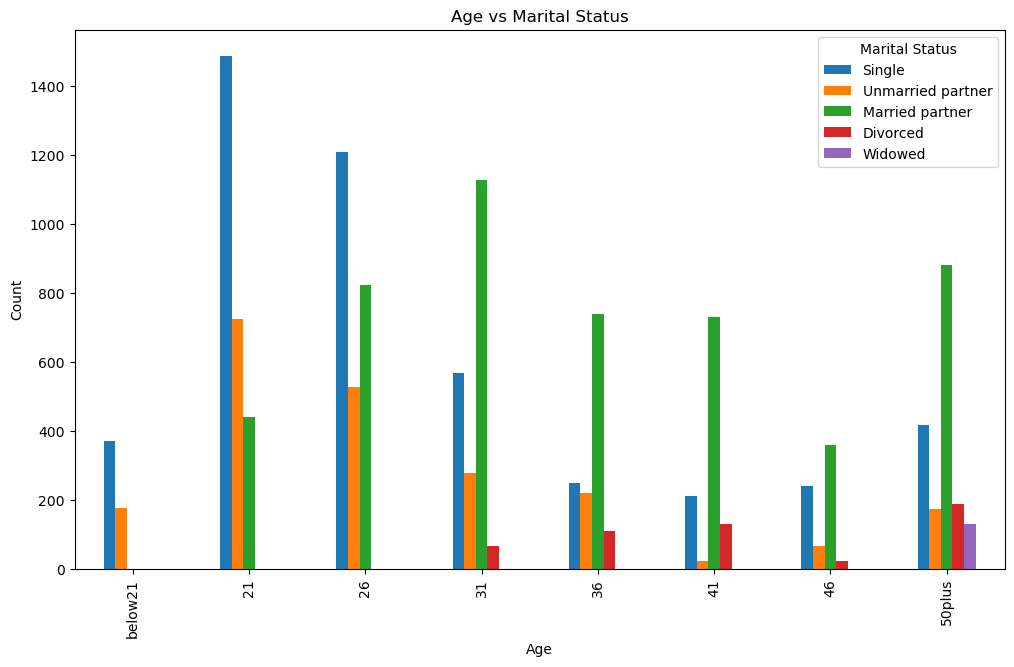

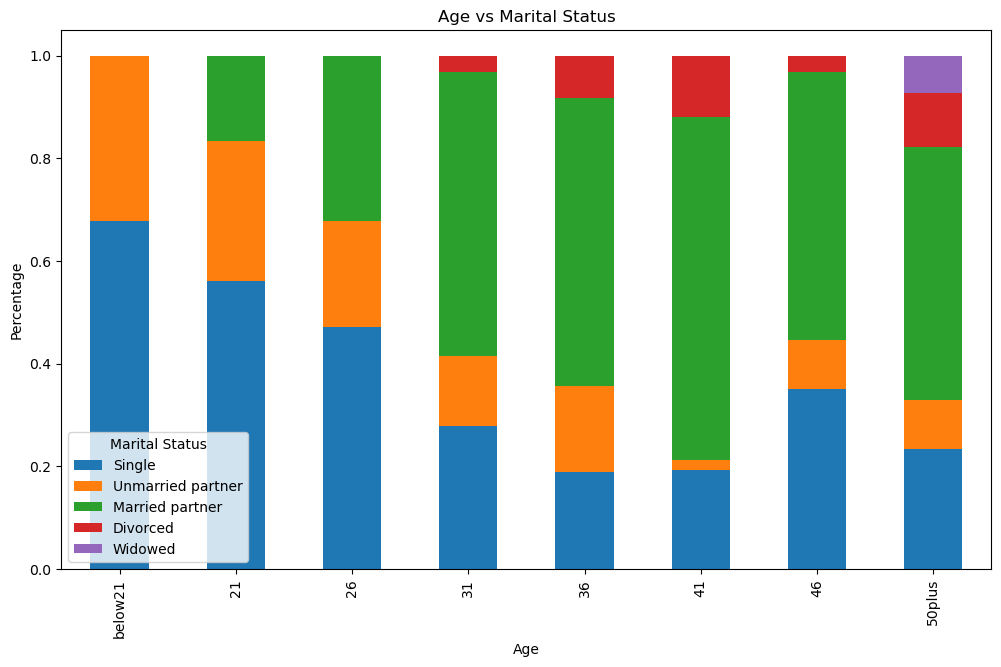

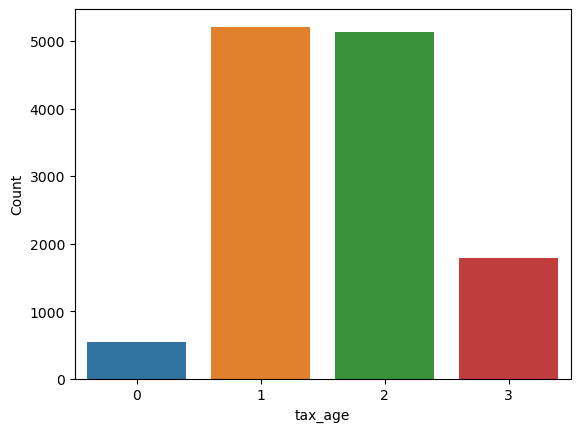

In [21]:
# analyzing age vs marital status

# defining 'age' categories order for visualization
custom_order_Age = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# defining 'maritalStatus' categories order for visualization
custom_order_MS = ['Single','Unmarried partner','Married partner','Divorced','Widowed']

# pivoting the data to get counts of each combination
pivot_df = df.groupby(['age', 'maritalStatus']).size().unstack().fillna(0)

# ordering the data based on the custom orders
pivot_df = pivot_df.reindex(custom_order_Age)[custom_order_MS]

# plotting grouped bar plot
pivot_df.plot(kind='bar', figsize=(12, 7), stacked=False)
plt.xlabel('Age')
plt.ylabel('Count')
# adding log scale to the y-axis
#plt.yscale('log')
plt.title('Age vs Marital Status')
plt.legend(title='Marital Status')
plt.show()

# redoing this, but to analyze the percentage of each marital status per age group instead of raw counts
pivot_df = df.groupby(['age', 'maritalStatus']).size().unstack().fillna(0)
pivot_df = pivot_df.reindex(custom_order_Age)[custom_order_MS]
pivot_df = pivot_df.apply(lambda x: x/x.sum(), axis=1)
pivot_df.plot(kind='bar', figsize=(12, 7), stacked=True)
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Age vs Marital Status')
plt.legend(title='Marital Status')
plt.show()

# now, we create the new taxonomized variable 'tax_age'
# along the rules:
# 0: below 21
# 1: 21, 26
# 2: 31, 36, 41, 46
# 3: 50plus

df['tax_age'] = df['age'].apply(lambda x: 0 if x == 'below21' else 1 if x == '21' or x == '26' else 2 if x == '31' or x == '36' or x == '41' or x == '46' else 3)

# visualize its distribution
sns.countplot(x='tax_age', data=df)
plt.xlabel('tax_age')
plt.ylabel('Count')
plt.show()



In [22]:
# check dataset column names

print(df.columns)

# 

print('\n')

print(df['expiration'].value_counts())

#print(df['maritalStatus'].value_counts())



Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y', 'tax_age'],
      dtype='object')


expiration
1d    7091
2h    5593
Name: count, dtype: int64


## Mutual Information Feature Selection

In [23]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
''' 
# Assuming your target variable column name is 'Y'
X = df.drop(columns='Y')
y = df['Y']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Create a DataFrame for MI scores and sort them in descending order
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score with Target': mi_scores
}).sort_values(by='MI Score with Target', ascending=False)

print(mi_df)
'''


" \n# Assuming your target variable column name is 'Y'\nX = df.drop(columns='Y')\ny = df['Y']\n\n# Compute mutual information scores\nmi_scores = mutual_info_classif(X, y, discrete_features=True)\n\n# Create a DataFrame for MI scores and sort them in descending order\nmi_df = pd.DataFrame({\n    'Feature': X.columns,\n    'MI Score with Target': mi_scores\n}).sort_values(by='MI Score with Target', ascending=False)\n\nprint(mi_df)\n"

## Feature Engineering

In [24]:
# checking the new dataset variables
print(df_test1.columns)
print('\n')
print('New dataset has', len(df_test1.columns), 'variables. \nOriginal dataset has', len(df.columns), 'variables.')

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'direction_same',
       'to_coupon', 'Y'],
      dtype='object')


New dataset has 22 variables. 
Original dataset has 27 variables.


### Coupon total frequency

In [25]:
# creating a new variable called coupon_freq_total which is the sum of all the coupon frequency variables
df_test1['coupon_freq_total'] = df_test1['CoffeeHouse'] + df_test1['CarryAway'] + df_test1['RestaurantLessThan20'] + df_test1['Restaurant20To50'] + df_test1['Bar']

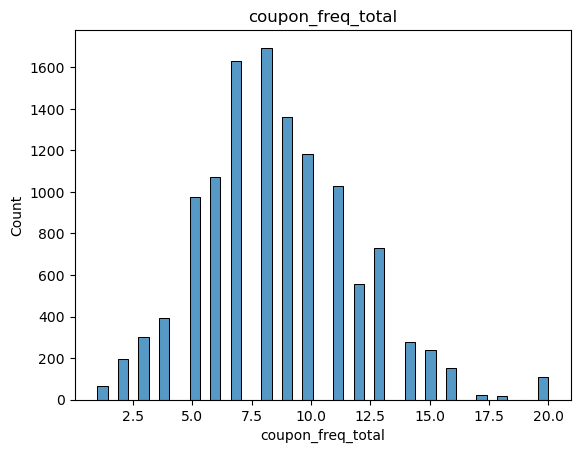

In [26]:
# checking the new variable coupon_freq_total

# histogram
sns.histplot(df_test1['coupon_freq_total'])
plt.title('coupon_freq_total')
plt.show()


In [27]:
# check dataset column names

print(df.columns)

# 

print('\n')

print(df['expiration'].value_counts())

#print(df['maritalStatus'].value_counts())



Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y', 'tax_age'],
      dtype='object')


expiration
1d    7091
2h    5593
Name: count, dtype: int64


## Mutual Information Feature Selection

In [28]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
''' 
# Assuming your target variable column name is 'Y'
X = df.drop(columns='Y')
y = df['Y']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Create a DataFrame for MI scores and sort them in descending order
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score with Target': mi_scores
}).sort_values(by='MI Score with Target', ascending=False)

print(mi_df)
'''


" \n# Assuming your target variable column name is 'Y'\nX = df.drop(columns='Y')\ny = df['Y']\n\n# Compute mutual information scores\nmi_scores = mutual_info_classif(X, y, discrete_features=True)\n\n# Create a DataFrame for MI scores and sort them in descending order\nmi_df = pd.DataFrame({\n    'Feature': X.columns,\n    'MI Score with Target': mi_scores\n}).sort_values(by='MI Score with Target', ascending=False)\n\nprint(mi_df)\n"

## Feature Engineering

In [29]:
# checking the new dataset variables
print(df_test1.columns)
print('\n')
print('New dataset has', len(df_test1.columns), 'variables. \nOriginal dataset has', len(df.columns), 'variables.')

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'direction_same',
       'to_coupon', 'Y', 'coupon_freq_total'],
      dtype='object')


New dataset has 23 variables. 
Original dataset has 27 variables.


### Coupon total frequency

In [30]:
# creating a new variable called coupon_freq_total which is the sum of all the coupon frequency variables
df_test1['coupon_freq_total'] = df_test1['CoffeeHouse'] + df_test1['CarryAway'] + df_test1['RestaurantLessThan20'] + df_test1['Restaurant20To50'] + df_test1['Bar']

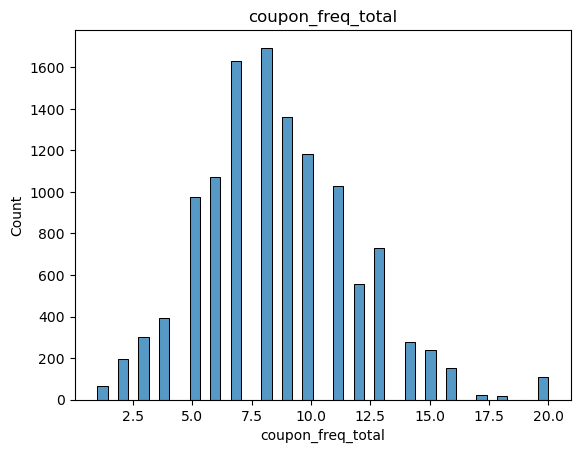

In [31]:
# checking the new variable coupon_freq_total

# histogram
sns.histplot(df_test1['coupon_freq_total'])
plt.title('coupon_freq_total')
plt.show()
